In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split

import sys
sys.path.append("../")
from src.scalers import *
from src.metrics import *

## Keras fully connected NN

### Load data

In [2]:
dataset = pd.DataFrame(pd.read_csv('../input/digit-recognizer/train.csv'))
dataset = np.array(dataset, dtype='float64')
X, y = dataset[:, 1:], dataset[:, 0, np.newaxis]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### Creating model

In [3]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1182/1182 [==============================] - 7s 4ms/step - loss: 5.8554 - accuracy: 0.8006
Epoch 2/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.5055 - accuracy: 0.9142
Epoch 3/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.3147 - accuracy: 0.9341
Epoch 4/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.2257 - accuracy: 0.9449
Epoch 5/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.1653 - accuracy: 0.9567
Epoch 6/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.1661 - accuracy: 0.9525
Epoch 7/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.1421 - accuracy: 0.9608
Epoch 8/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.1144 - accuracy: 0.9674
Epoch 9/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.1057 - accuracy: 0.9689
Epoch 10/10
1182/1182 [==============================] - 5s 4ms/step - loss: 0.108

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [6]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

132/132 [==============================] - 1s 3ms/step - loss: 0.1873 - accuracy: 0.9552
0.1873326152563095
0.9552381038665771


In [7]:
# model.save('epic_num_reader.model')
# new_model = tf.keras.models.load_model('epic_num_reader.model')
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=-1)

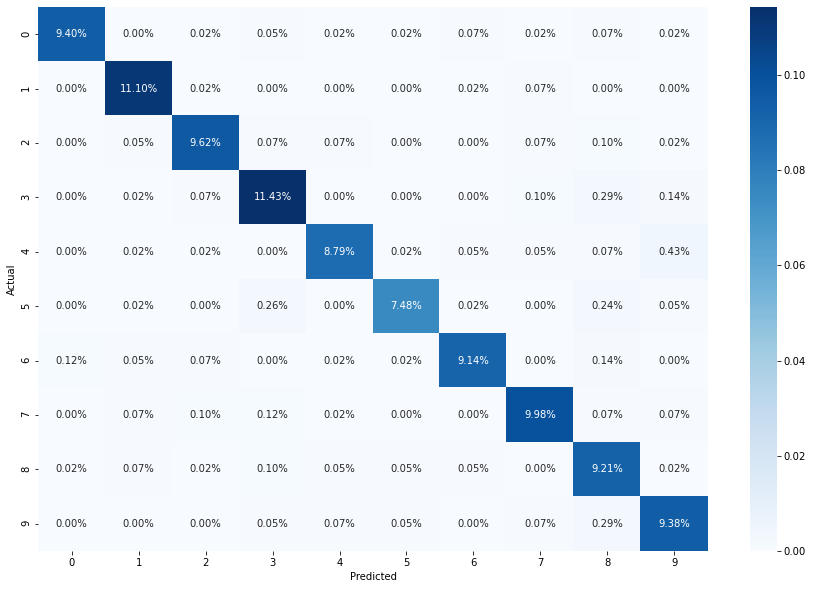

In [8]:
accuracy = plot_confusion_matrix(y_test, y_pred, fig_size=(15, 10))

In [9]:
print(f'Accuracy {accuracy}')

Accuracy 0.9552380952380952
